## അടിസ്ഥാന പാൻഡാസ് ഉദാഹരണങ്ങൾ

ഈ നോട്ട്‌ബുക്ക് നിങ്ങൾക്ക് ചില അടിസ്ഥാന പാൻഡാസ് ആശയങ്ങൾ വഴി നടത്തിക്കൊണ്ടിരിക്കും. നാം സാധാരണ ഡാറ്റാ സയൻസ് ലൈബ്രറികൾ ഇറക്കുമതി ചെയ്യുന്നതിൽ നിന്ന് ആരംഭിക്കും:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### സീരീസ്

സീരീസ് ഒരു ലിസ്റ്റ് അല്ലെങ്കിൽ 1D-അറേ പോലെയാണ്, പക്ഷേ ഇൻഡക്സ് ഉള്ളത്. എല്ലാ പ്രവർത്തനങ്ങളും ഇൻഡക്സ്-അലൈൻ ചെയ്തതാണ്.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


സീരീസുകളുടെ പതിവ് ഉപയോഗങ്ങളിൽ ഒന്നാണ് **ടൈം സീരീസ്**. ടൈം സീരീസിൽ, ഇൻഡക്സിന് പ്രത്യേക ഘടനയുണ്ട് - സാധാരണയായി തീയതികളുടെ അല്ലെങ്കിൽ ഡേറ്റൈമുകളുടെ ഒരു പരിധി. `pd.date_range` ഉപയോഗിച്ച് ഇത്തരത്തിലുള്ള ഇൻഡക്സ് സൃഷ്ടിക്കാം.

നമുക്ക് പ്രതിദിനം വാങ്ങിയ ഉൽപ്പന്നത്തിന്റെ അളവ് കാണിക്കുന്ന ഒരു സീരീസ് ഉണ്ടെന്ന് കരുതുക, കൂടാതെ ഓരോ ഞായറാഴ്ചയും ഞങ്ങൾക്കായി ഒരു ഇനം എടുത്തു വെക്കേണ്ടതുണ്ടെന്ന് നമുക്ക് അറിയാം. സീരീസ് ഉപയോഗിച്ച് അത് മോഡൽ ചെയ്യുന്നത് ഇങ്ങനെ ആണ്:


Length of index is 366


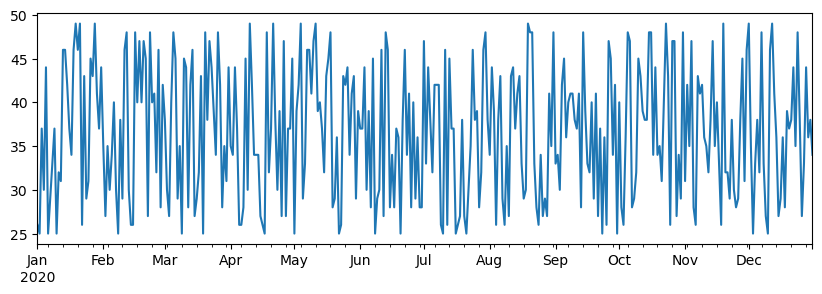

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


നിങ്ങൾക്ക് കാണാമെന്നപോലെ, ഞങ്ങൾ ഇവിടെ പ്രശ്നങ്ങൾ നേരിടുകയാണ്, കാരണം ആഴ്ചവാര സീരീസിൽ പരാമർശിക്കപ്പെടാത്ത ദിവസങ്ങൾ നഷ്ടമായതായി (`NaN`) കണക്കാക്കപ്പെടുന്നു, കൂടാതെ ഒരു സംഖ്യയിലേക്ക് `NaN` ചേർക്കുന്നത് `NaN` തന്നെയാണ് നൽകുന്നത്. ശരിയായ ഫലം ലഭിക്കാൻ, സീരീസ് ചേർക്കുമ്പോൾ `fill_value` വ്യക്തമാക്കേണ്ടതുണ്ട്:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


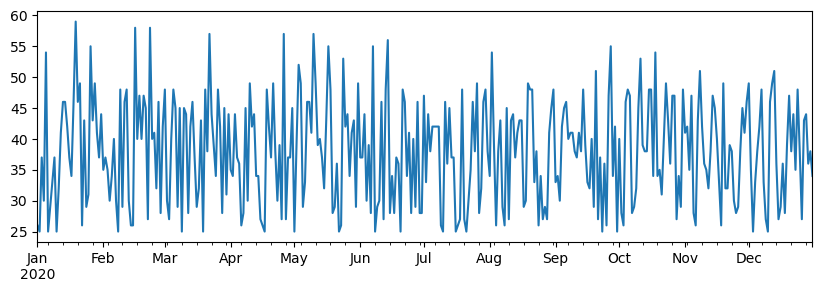

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

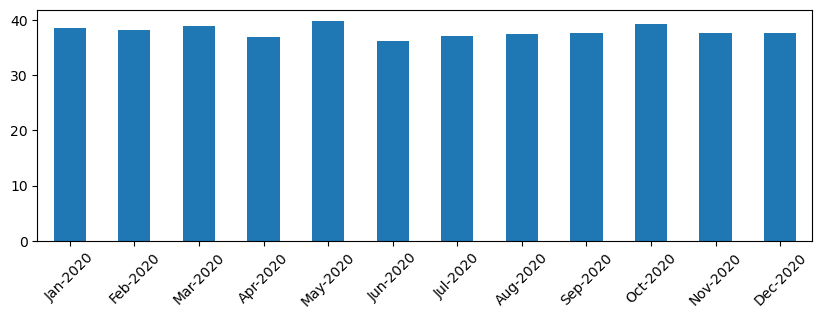

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

ഒരു ഡാറ്റാഫ്രെയിം അടിസ്ഥാനപരമായി ഒരേ ഇൻഡക്സ് ഉള്ള സീരീസുകളുടെ ഒരു ശേഖരമാണ്. നാം പല സീരീസുകളെയും ചേർത്ത് ഒരു ഡാറ്റാഫ്രെയിം ഉണ്ടാക്കാം. മുകളിൽ നിർവചിച്ച `a` ഉം `b` ഉം സീരീസുകൾ നൽകിയാൽ:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

നാം സീരീസുകൾ കോളങ്ങളായി ഉപയോഗിക്കാനും, ഡിക്ഷണറി ഉപയോഗിച്ച് കോളം പേരുകൾ വ്യക്തമാക്കാനും കഴിയും:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

മുൻ ഉദാഹരണവുമായി പൊരുത്തപ്പെടാൻ കോളങ്ങൾ ട്രാൻസ്പോസ് ചെയ്ത് (അതിനുശേഷം പേരുകൾ മാറ്റി) സമാനമായ ഫലം നേടാം:


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**DataFrame**-ൽ നിന്നുള്ള കോളങ്ങൾ തിരഞ്ഞെടുക്കുന്നത് ഇങ്ങനെ ചെയ്യാം:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**ഫിൽട്ടർ വ്യഞ്ജനത്തിന്റെ അടിസ്ഥാനത്തിൽ** വരികൾ തിരഞ്ഞെടുക്കൽ:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

ഇത് പ്രവർത്തിക്കുന്നത് ഇങ്ങനെ ആണ്: `df['A']<5` എന്ന പ്രകടനം ഒരു ബൂളിയൻ സീരീസ് നൽകുന്നു, ഇത് സീരീസിലെ ഓരോ ഘടകത്തിനും പ്രകടനം `True` ആണോ `False` ആണോ എന്ന് സൂചിപ്പിക്കുന്നു. സീരീസ് ഒരു ഇൻഡക്സായി ഉപയോഗിക്കുമ്പോൾ, അത് ഡാറ്റാഫ്രെയിമിലെ വരികളുടെ ഉപസമൂഹം നൽകുന്നു. അതിനാൽ, യാദൃച്ഛികമായ Python ബൂളിയൻ പ്രകടനം ഉപയോഗിക്കുന്നത് സാധ്യമല്ല, ഉദാഹരണത്തിന്, `df[df['A']>5 and df['A']<7]` എഴുതുന്നത് തെറ്റാണ്. പകരം, ബൂളിയൻ സീരീസുകളിൽ പ്രത്യേക `&` ഓപ്പറേഷൻ ഉപയോഗിക്കണം:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**പുതിയ കംപ്യൂട്ടബിൾ കോളങ്ങൾ സൃഷ്ടിക്കൽ**. ഞങ്ങൾ എളുപ്പത്തിൽ മനസ്സിലാകുന്ന പ്രകടനങ്ങൾ ഉപയോഗിച്ച് നമ്മുടെ ഡാറ്റാഫ്രെയിമിനായി പുതിയ കംപ്യൂട്ടബിൾ കോളങ്ങൾ സൃഷ്ടിക്കാം. താഴെയുള്ള കോഡ് A യുടെ ശരാശരി മൂല്യത്തിൽ നിന്നുള്ള വ്യത്യാസം കണക്കാക്കുന്നു.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

നാം യഥാർത്ഥത്തിൽ ചെയ്യുന്നത് ഒരു ശ്രേണി കണക്കാക്കുകയാണ്, പിന്നീട് ഈ ശ്രേണി ഇടതുവശത്തുള്ള ഭാഗത്തേക്ക് നിയോഗിച്ച് മറ്റൊരു കോളം സൃഷ്ടിക്കുന്നത്.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**എണ്ണങ്ങളുടെ അടിസ്ഥാനത്തിൽ വരികൾ തിരഞ്ഞെടുക്കൽ** `iloc` ഘടകം ഉപയോഗിച്ച് ചെയ്യാം. ഉദാഹരണത്തിന്, DataFrame-ൽ നിന്ന് ആദ്യ 5 വരികൾ തിരഞ്ഞെടുക്കാൻ:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**ഗ്രൂപ്പിംഗ്** എക്സെലിലെ *പിവോട്ട് ടേബിളുകൾ* പോലുള്ള ഫലം ലഭിക്കാൻ സാധാരണയായി ഉപയോഗിക്കുന്നു. നമുക്ക് ഓരോ നൽകിയ `LenB` സംഖ്യയ്ക്കും `A` കോളത്തിന്റെ ശരാശരി മൂല്യം കണക്കാക്കണമെന്ന് فرضിക്കാം. അപ്പോൾ നാം നമ്മുടെ ഡാറ്റാഫ്രെയിം `LenB` പ്രകാരം ഗ്രൂപ്പ് ചെയ്ത് `mean` വിളിക്കാം:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

നമുക്ക് ഗ്രൂപ്പിലെ ശരാശരി മൂല്യവും ഘടകങ്ങളുടെ എണ്ണംയും കണക്കാക്കേണ്ടതുണ്ടെങ്കിൽ, നാം കൂടുതൽ സങ്കീർണ്ണമായ `aggregate` ഫംഗ്ഷൻ ഉപയോഗിക്കാം:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## പ്രിന്റിംഗ് ആൻഡ് പ്ലോട്ടിംഗ്

ഡാറ്റ സയന്റിസ്റ്റ് പലപ്പോഴും ഡാറ്റ എക്സ്പ്ലോർ ചെയ്യേണ്ടതുണ്ടാകുന്നു, അതിനാൽ അതിനെ ദൃശ്യവൽക്കരിക്കാൻ കഴിയുന്നത് പ്രധാനമാണ്. DataFrame വലുതായിരിക്കുമ്പോൾ, പലപ്പോഴും നാം ശരിയായി എല്ലാം ചെയ്യുകയാണെന്ന് ഉറപ്പാക്കാൻ ആദ്യ കുറച്ച് വരികൾ മാത്രം പ്രിന്റ് ചെയ്യാൻ ആഗ്രഹിക്കുന്നു. ഇത് `df.head()` വിളിച്ച് ചെയ്യാം. നിങ്ങൾ Jupyter Notebook ൽ ഇത് റൺ ചെയ്താൽ, അത് DataFrame ഒരു മനോഹരമായ ടേബുലർ രൂപത്തിൽ പ്രിന്റ് ചെയ്യും.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

നാം ചില കോളങ്ങൾ ദൃശ്യവൽക്കരിക്കാൻ `plot` ഫംഗ്ഷന്റെ ഉപയോഗവും കണ്ടിട്ടുണ്ട്. `plot` പല ജോലികൾക്കും വളരെ ഉപകാരപ്രദമാണ്, കൂടാതെ `kind=` പാരാമീറ്ററിലൂടെ പലവിധ ഗ്രാഫ് തരം പിന്തുണയ്ക്കുന്നു, എന്നാൽ നിങ്ങൾക്ക് എപ്പോഴും കൂടുതൽ സങ്കീർണ്ണമായ ഒന്നിനെ പ്ലോട്ട് ചെയ്യാൻ കച്ചവട `matplotlib` ലൈബ്രറി ഉപയോഗിക്കാം. ഡാറ്റാ ദൃശ്യവൽക്കരണം പ്രത്യേകം കോഴ്‌സ് പാഠങ്ങളിൽ വിശദമായി പരിഗണിക്കും.


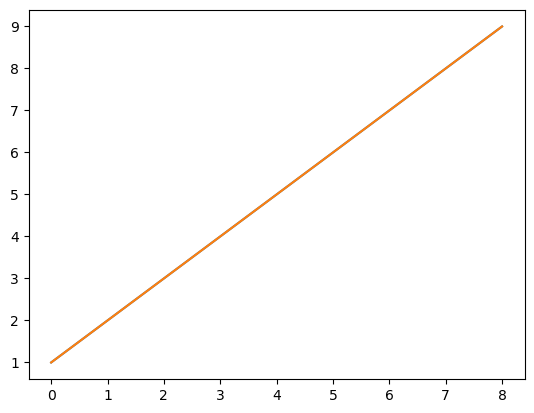

In [61]:
df['A'].plot()
plt.show()

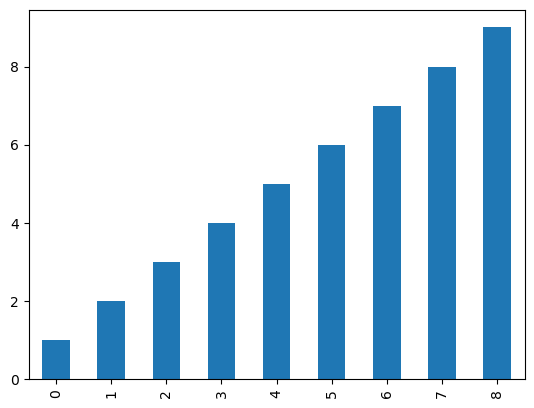

In [63]:
df['A'].plot(kind='bar')
plt.show()

ഈ അവലോകനം Pandas-ന്റെ ഏറ്റവും പ്രധാനപ്പെട്ട ആശയങ്ങളെക്കുറിച്ചാണ്, എങ്കിലും, ലൈബ്രറി വളരെ സമ്പന്നമാണ്, അതിനാൽ നിങ്ങൾ അതിനോടൊപ്പം ചെയ്യാൻ കഴിയുന്ന കാര്യങ്ങൾക്ക് യാതൊരു പരിധിയും ഇല്ല! ഇപ്പോൾ നമുക്ക് ഈ അറിവ് പ്രത്യേക പ്രശ്നം പരിഹരിക്കാൻ പ്രയോഗിക്കാം.


---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**അസൂയാ**:  
ഈ രേഖ AI വിവർത്തന സേവനം [Co-op Translator](https://github.com/Azure/co-op-translator) ഉപയോഗിച്ച് വിവർത്തനം ചെയ്തതാണ്. നാം കൃത്യതയ്ക്ക് ശ്രമിച്ചെങ്കിലും, സ്വയം പ്രവർത്തിക്കുന്ന വിവർത്തനങ്ങളിൽ പിശകുകൾ അല്ലെങ്കിൽ തെറ്റുകൾ ഉണ്ടാകാമെന്ന് ദയവായി ശ്രദ്ധിക്കുക. അതിന്റെ മാതൃഭാഷയിലുള്ള യഥാർത്ഥ രേഖയാണ് പ്രാമാണികമായ ഉറവിടം എന്ന് പരിഗണിക്കേണ്ടതാണ്. നിർണായകമായ വിവരങ്ങൾക്ക്, പ്രൊഫഷണൽ മനുഷ്യ വിവർത്തനം ശുപാർശ ചെയ്യപ്പെടുന്നു. ഈ വിവർത്തനം ഉപയോഗിക്കുന്നതിൽ നിന്നുണ്ടാകുന്ന ഏതെങ്കിലും തെറ്റിദ്ധാരണകൾക്കോ വ്യാഖ്യാനക്കേടുകൾക്കോ ഞങ്ങൾ ഉത്തരവാദികളല്ല.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
